In [25]:
import pandas as pd
import requests as req
from citipy import citipy 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time as time
pd.options.mode.chained_assignment = None
key="601a7ae6f5b95fdaf321985e27740714"


In [26]:
#random latitudes and longitudes
data= pd.DataFrame(columns =['Lat',"Lng","City","Temperature","Humidity","Clouds","Wind Speed"])
lat = []
lng = []
for x in range(0,1200):
    lat.append(random.uniform(-90,91))
    lng.append(random.uniform(-181,181))
data['Lat']=lat
data['Lng']=lng
data.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,-47.766082,59.101237,NaN,NaN,NaN,NaN,NaN
1,37.746916,56.772522,NaN,NaN,NaN,NaN,NaN
2,-84.190699,-106.405345,NaN,NaN,NaN,NaN,NaN
3,-86.475574,-155.345568,NaN,NaN,NaN,NaN,NaN
4,-64.299750,-48.957429,NaN,NaN,NaN,NaN,NaN


In [27]:
#the cities that are related to the coordinates
cities =[]
for index, row in data.iterrows():
    city=citipy.nearest_city(row["Lat"],row["Lng"])
    cities.append(city.city_name)
data['City']=cities
data.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,-47.766082,59.101237,taolanaro,NaN,NaN,NaN,NaN
1,37.746916,56.772522,bojnurd,NaN,NaN,NaN,NaN
2,-84.190699,-106.405345,punta arenas,NaN,NaN,NaN,NaN
3,-86.475574,-155.345568,mataura,NaN,NaN,NaN,NaN
4,-64.299750,-48.957429,ushuaia,NaN,NaN,NaN,NaN


In [28]:
#check for and remove duplicates - 500 unique cities to test
new_data = data.drop_duplicates("City",keep="first")
len(new_data)

531

In [36]:
#create empty arrays to store the data for temperature, humidity, clouds, and wind speed 
temp = []
humidity =[]
clouds = []
wind = []

counter = 0
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

#iterate through the rows to pull data from the api 
for index, row in new_data.iterrows():
    counter +=1
    city = row["City"]
    target_url = url+city+"&appid="+key+"&units="+units
    print("we are now on city number "+str(counter))
    print("The name of the city is "+row["City"])
    print(target_url)
    print("__________________________________________________________________________________________")
    info = req.get(target_url).json()
    temp.append(info['main']['temp'])
    humidity.append(info['main']['humidity'])
    clouds.append(info['clouds']['all'])
    wind.append(info['wind']['speed'])
    time.sleep(1)
#assign the values from the arrays to the data frame
new_data["Temperature"]=temp
new_data["Humidity"]=humidity
new_data["Clouds"]=clouds
new_data["Wind Speed"]=wind

we are now on city number 1
The name of the city is taolanaro
https://api.openweathermap.org/data/2.5/weather?q=taolanaro&appid=601a7ae6f5b95fdaf321985e27740714&units=imperial
__________________________________________________________________________________________


KeyError: 'main'

In [30]:
new_data.head()


,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,-47.766082,59.101237,taolanaro,NaN,NaN,NaN,NaN
1,37.746916,56.772522,bojnurd,NaN,NaN,NaN,NaN
2,-84.190699,-106.405345,punta arenas,NaN,NaN,NaN,NaN
3,-86.475574,-155.345568,mataura,NaN,NaN,NaN,NaN
4,-64.299750,-48.957429,ushuaia,NaN,NaN,NaN,NaN


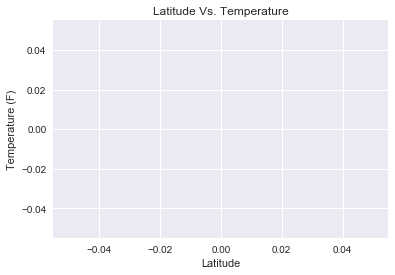

In [37]:
#Latitude Vs Temperature Scatter Plot
plt.scatter(new_data["Lat"],new_data["Temperature"],marker ="o")
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set()
plt.show()

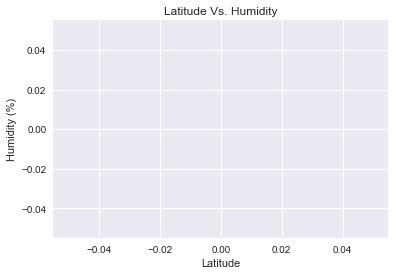

In [32]:
#Humidity Vs. Latitude Scatter Plot
plt.scatter(new_data["Lat"],new_data["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
sns.set()
plt.show()

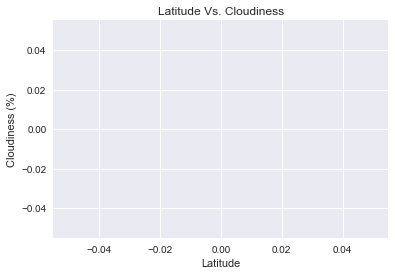

In [33]:
#Cloudiness Vs. Latitude Scatter Plot
plt.scatter(new_data["Lat"],new_data["Clouds"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.show()

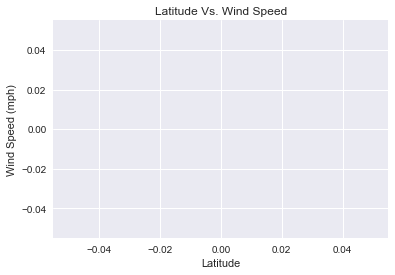

In [34]:
#Wind Speed Vs. Latitude Scatter Plot
plt.scatter(new_data["Lat"],new_data["Wind Speed"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.show()